# China's Annual GDP Per Province
Analysis of GDP per province of China from 1992-2020 inclusive. The data does not include Hong Kong SAR, Macau SAR, nor Taiwan.

## Setup
Importing libraries:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import json
import topojson

Defining function to display Markdown:

In [2]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

## Loading, Inspecting & Cleaning

In [3]:
chinagdp_df = pd.read_csv('input/Chinas GDP in Province En.csv')

chinagdp_df.head()

,Unnamed: 0,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Chongqing,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang
0,2020,36102.6,14083.7,36206.9,17651.9,17359.8,25115.0,12311.3,13698.5,38700.6,...,25002.8,48598.8,17826.6,24521.9,1902.7,26181.9,9016.7,3005.9,3920.6,13797.6
1,2019,35445.1,14055.5,34978.6,16961.6,17212.5,24855.3,11726.8,13544.4,37987.6,...,23605.8,46363.8,16769.3,23223.8,1697.8,25793.2,8718.3,2941.1,3748.5,13597.1
2,2018,33106.0,13362.9,32494.6,15958.1,16140.8,23510.5,11253.8,12846.5,36011.8,...,21588.8,42902.1,15353.2,20880.6,1548.4,23941.9,8104.1,2748.0,3510.2,12809.4
3,2017,29883.0,12450.6,30640.8,14484.3,14898.1,21693.0,10922.0,12313.0,32925.0,...,20066.3,37905.1,13605.4,18486.0,1349.0,21473.5,7336.7,2465.1,3200.3,11159.9
4,2016,27041.2,11477.2,28474.1,11946.4,13789.3,20392.5,10427.0,11895.0,29887.0,...,18023.0,33138.5,11792.4,16369.0,1173.0,19045.8,6907.9,2258.2,2781.4,9630.8


**Renaming columns**:

In [4]:
chinagdp_df.rename({'Unnamed: 0':'year',
                    'Guangxi,':'Guangxi'}, 
                   axis=1, 
                   inplace=True)

chinagdp_df.columns

Index(['year', 'Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'Inner Mongolia',
       'Liaoning', 'Jilin', 'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang',
       'Anhui', 'Fujian', 'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan',
       'Guangdong', 'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou',
       'Yunnan', 'Tibet', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia',
       'Xinjiang'],
      dtype='object')

In [5]:
chinagdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            29 non-null     int64  
 1   Beijing         29 non-null     float64
 2   Tianjin         29 non-null     float64
 3   Hebei           29 non-null     float64
 4   Shanxi          29 non-null     float64
 5   Inner Mongolia  29 non-null     float64
 6   Liaoning        29 non-null     float64
 7   Jilin           29 non-null     float64
 8   Heilongjiang    29 non-null     float64
 9   Shanghai        29 non-null     float64
 10  Jiangsu         29 non-null     float64
 11  Zhejiang        29 non-null     float64
 12  Anhui           29 non-null     float64
 13  Fujian          29 non-null     float64
 14  Jiangxi         29 non-null     float64
 15  Shandong        29 non-null     float64
 16  Henan           29 non-null     float64
 17  Hubei           29 non-null     float

In [6]:
chinagdp_df.describe()

,year,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Chongqing,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2006.000000,12719.227586,5536.720690,14254.644828,6732.137931,6485.582759,11209.541379,5135.641379,6601.07931,14671.379310,...,7843.668966,15689.603448,5036.268966,7647.300000,529.958621,8744.458621,3377.065517,1026.158621,1314.896552,4818.386207
std,8.514693,11543.977127,4728.705512,11481.657587,5603.402084,5790.702936,7953.052425,4075.496558,4470.22818,12149.921416,...,7803.860056,15000.862075,5464.615192,7392.931623,552.430037,8607.792584,2872.867915,953.564196,1254.865638,4375.124693
min,1992.000000,710.200000,411.000000,1278.500000,551.100000,421.700000,1473.000000,558.100000,857.40000,1114.300000,...,462.500000,1177.300000,339.900000,618.700000,33.300000,531.600000,317.800000,87.500000,83.100000,402.300000
25%,1999.000000,2759.800000,1435.600000,4158.900000,1667.100000,1379.300000,4171.700000,1673.000000,2536.90000,4222.300000,...,1687.800000,3649.100000,937.500000,1899.800000,106.000000,1592.600000,956.300000,239.400000,264.600000,1163.200000
50%,2006.000000,8387.000000,3538.200000,10043.000000,4713.600000,4161.800000,8390.300000,3226.500000,5329.80000,10598.900000,...,3900.300000,8494.700000,2264.100000,4090.700000,285.900000,4595.600000,2203.000000,585.200000,683.300000,2957.300000
75%,2013.000000,21134.600000,9945.400000,24259.600000,11836.400000,11392.400000,19208.800000,9427.900000,11690.00000,23204.100000,...,13027.600000,26518.000000,7973.100000,12825.500000,828.200000,15905.400000,6014.500000,1713.300000,2327.700000,8392.600000
max,2020.000000,36102.600000,14083.700000,36206.900000,17651.900000,17359.800000,25115.000000,12311.300000,13698.50000,38700.600000,...,25002.800000,48598.800000,17826.600000,24521.900000,1902.700000,26181.900000,9016.700000,3005.900000,3920.600000,13797.600000


### De-duplicating

In [7]:
chinagdp_df[chinagdp_df.duplicated()]

,year,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Chongqing,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang


### Missing

In [8]:
chinagdp_df.isna().sum()

year              0
Beijing           0
Tianjin           0
Hebei             0
Shanxi            0
Inner Mongolia    0
Liaoning          0
Jilin             0
Heilongjiang      0
Shanghai          0
Jiangsu           0
Zhejiang          0
Anhui             0
Fujian            0
Jiangxi           0
Shandong          0
Henan             0
Hubei             0
Hunan             0
Guangdong         0
Guangxi           0
Hainan            0
Chongqing         0
Sichuan           0
Guizhou           0
Yunnan            0
Tibet             0
Shaanxi           0
Gansu             0
Qinghai           0
Ningxia           0
Xinjiang          0
dtype: int64

### Table Structure

In [9]:
# melting table
chinagdp_df2 = chinagdp_df.melt(id_vars=['year'],
                                var_name=['province'], 
                                value_name='gdp')

# reordering columns & sorting values
chinagdp_df2 = chinagdp_df2[['province', 'year', 'gdp']]\
                .sort_values(['province', 'year'])\
                .reset_index(drop=True)

chinagdp_df2.head()

,province,year,gdp
0,Anhui,1992,827.0
1,Anhui,1993,1073.5
2,Anhui,1994,1378.9
3,Anhui,1995,1891.2
4,Anhui,1996,2199.7


## Visualisations

### Distribution
Using side-by-side boxplots, plotting the distribution of annual GDP per Province over 1992-2020. 

Most notable insights are:
* Guangdong (广东) (Canton) has the highest range, and highest median annual GDP. 
* Tibet Autonomous Region (西藏) has the lowest range and lowest median annual GDP.

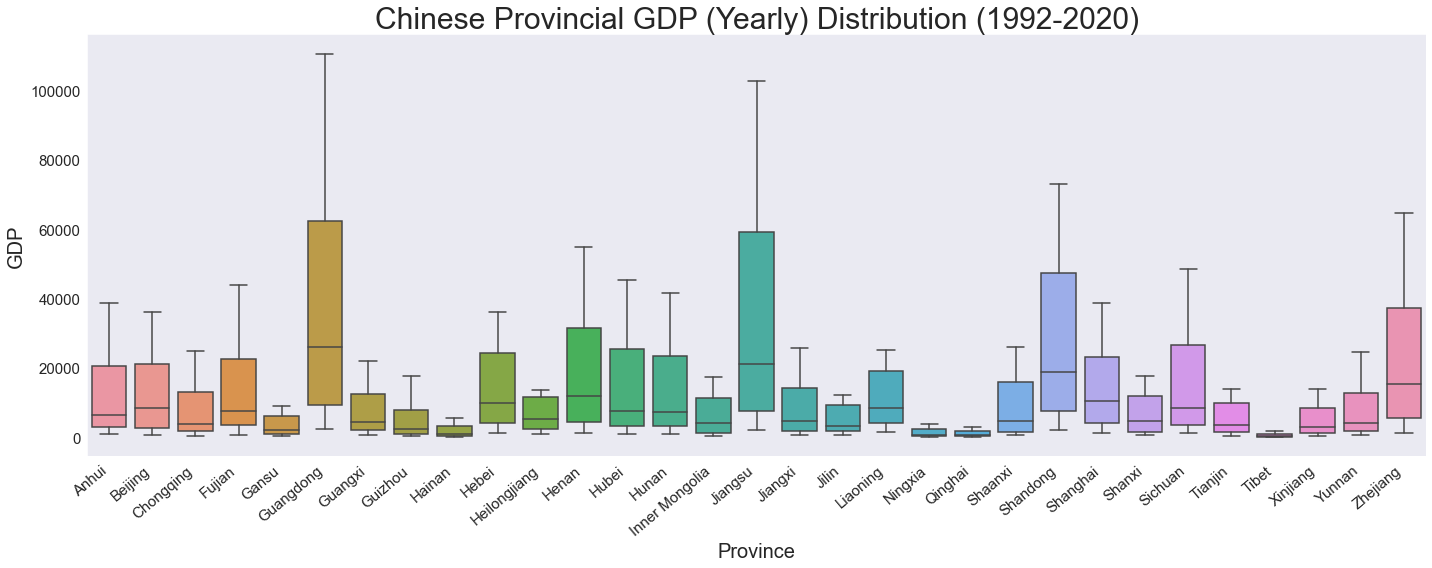

<Figure size 432x288 with 0 Axes>

In [10]:
sns.set_style('dark')

plt.figure(figsize=(20,8))

axbp = sns.boxplot(data=chinagdp_df2, x='province', y='gdp')
axbp.set_xlabel('Province', fontsize=20)
axbp.set_ylabel('GDP', fontsize=20)
axbp.set_title('Chinese Provincial GDP (Yearly) Distribution (1992-2020)', fontsize=30)

# rotating x-labels as they overlap
axbp.set_xticklabels(axbp.get_xticklabels(), rotation=40, ha='right')
axbp.tick_params(labelsize=15)

plt.tight_layout()

plt.show()

plt.clf()

### Annual GDP Over Time
Visualising annual GDP, across all provinces, as time-series over 1992-2020 inclusive.

Insights from the side-by-side, area charts include:
* All provinces had low annual GDP in 1992 and grew over time at various rates
* Guangdong (广东) experienced the greatest growth over time, and leads annual GDP as of 2020
* Jiangsu (江苏) also experienced growth over time, and is second place for annual GDP as of 2020
* By contrast, Tibet Autonomous Region (西藏) experienced minimal growth in annual GDP

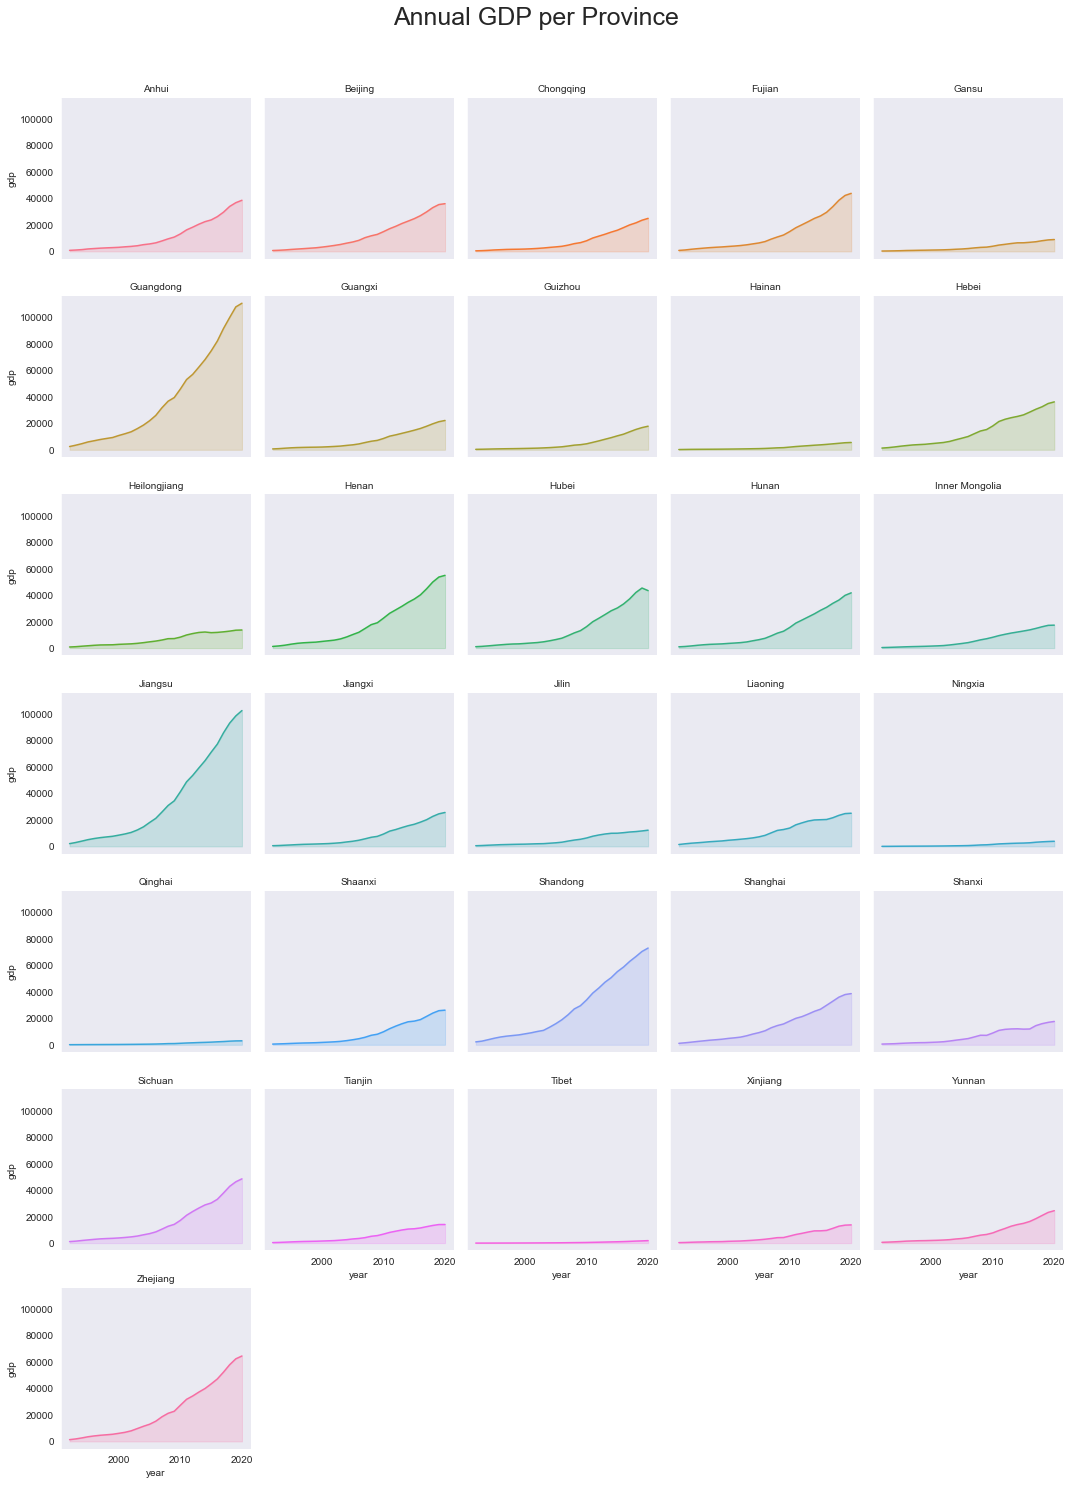

<Figure size 432x288 with 0 Axes>

In [11]:
grid = sns.FacetGrid(chinagdp_df2, col='province', hue='province', col_wrap=5, )
grid.map(plt.plot, 'year', 'gdp')
grid.map(plt.fill_between, 'year', 'gdp', alpha=0.2).set_titles('{col_name}', fontsize=20)

plt.subplots_adjust(top=0.92)

grid.fig.suptitle('Annual GDP per Province', fontsize=25)

plt.show()

plt.clf()

### Geographical
Examining if there are geographical factors that impact annual GDP.

In [44]:
# normalise data by year
chinagdp_norm = chinagdp_df2
chinagdp_norm['percentage_per_year'] = 100 * chinagdp_norm.gdp / chinagdp_norm.groupby('year').gdp.transform('sum')

chinagdp_norm = chinagdp_norm.sort_values(['year', 'province'])

chinagdp_norm.head()

,province,year,gdp,percentage_per_year
0,Anhui,1992,827.0,3.186161
29,Beijing,1992,710.2,2.736169
58,Chongqing,1992,462.5,1.781862
87,Fujian,1992,784.7,3.023193
116,Gansu,1992,317.8,1.224380


In [57]:
with open('input/china_geojson.json') as file:
    china_json = json.load(file)

def china_choro(year, colors):
    # filter df by year
    df_filtered = chinagdp_norm[chinagdp_norm.year==year]
    
    # create Choropleth
    fig = go.Figure(go.Choroplethmapbox(geojson=china_json,
                                        locations=df_filtered.province, 
                                        z=df_filtered.percentage_per_year,
                                        colorscale=colors, 
                                        colorbar_ticksuffix = '%',
                                        colorbar_title = 'Proportion of<br>Total Annual GDP',
                                        zmin=0, zmax=chinagdp_norm.percentage_per_year.max(),
                                        marker_opacity=0.5, 
                                        marker_line_width=1))
    fig.update_layout(title_text=f'Annual GDP in {year}',
                      mapbox_style='white-bg',
                      mapbox_zoom=3, mapbox_center = {'lat': 38, 'lon': 104.1954})
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    
    
    # show title
    printmd(f'<h3 align="center">GDP in {year}</h3>')
    fig.show()

In [58]:
china_choro(1992, 'YlGnBu')

<h3 align="center">GDP in 1992</h3>

In [59]:
china_choro(2020, 'YlGnBu')

<h3 align="center">GDP in 2020</h3>

## Adding Regions ==> see if geography statistically significantly affects GDP
https://en.wikipedia.org/wiki/List_of_regions_of_China

## Add categories (autonomous region, metropolitan, province) ==> see if statistically significantly affects annual GDP
Can also separate based on whether they are an autonomous region, a metropolis or province

## Hypothesis testing associations across the board (Anova), and which ones in particular (Tukley?)